## California Forage Species:
Sebastes_miniatus
Doryteuthis_opalescens
Engraulis_mordax
Clupea_pallasii
Sardinops_sagax
Scomber_japonicus
Trachurus_symmetricus
Merluccius_productus
Ommastrephes_bartramii
Onychoteuthis_borealijaponica
Alosa_sapidissima
Hypomesus_pretiosus
Spirinchus_starksi
Spirinchus_thaleichthys
Thaleichthys_pacificus
Allosmerus_elongatus
Hypomesus_transpacificus
Mallotus_villosus
Atherinops_affinis
Atherinopsis_californiensis
Cololabis_saira
Ammodytes_hexapterus
Sebastes_jordani
Microgadus_proximus
Genyonemus_lineatus

https://oceana.org/sites/default/files/reports/Forage_Fish_OCEANA_2011_final.pdf

In [8]:
!mkdir -p /workdir/aquaculture/genbankspecieslevel/data/pacific

In [29]:
%%bash
for i in Sebastes_miniatus Doryteuthis_opalescens Engraulis_mordax Clupea_pallasii Sardinops_sagax Scomber_japonicus Trachurus_symmetricus Merluccius_productus Ommastrephes_bartramii Onychoteuthis_borealijaponica Alosa_sapidissima Hypomesus_pretiosus Spirinchus_starksi Spirinchus_thaleichthys Thaleichthys_pacificus Allosmerus_elongatus Hypomesus_transpacificus Mallotus_villosus Atherinops_affinis Atherinopsis_californiensis Cololabis_saira Ammodytes_hexapterus Sebastes_jordani Microgadus_proximus Genyonemus_lineatus; do
    QUERY="$( echo $i | sed 's/_/ /g' )"
    TAXINFO="$( esearch -db taxonomy -query "${QUERY}" \
    | efetch -db taxonomy -format docsum \
    | xtract -pattern DocumentSummary -if Rank -equals species -element Id \
    | sed 's/\s/|/g' )"
    echo "${TAXINFO}|${i}"
done > /workdir/aquaculture/genbankspecieslevel/data/pacific/GENBANKFISHES.txt

In [31]:
%%bash
for i in $( cat /workdir/aquaculture/genbankspecieslevel/data/pacific/GENBANKFISHES.txt); do
    TAXID="$( echo ${i} | cut -d "|" -f 1 )"
    NAME="$( echo ${i} | cut -d "|" -f 2 )"
    NUMSEQ="$( esearch -db nuccore -query "txid${TAXID}[Organism:exp] AND animals[filter] AND (\"COXI\"[All Fields] OR \"COX1\"[All Fields] OR \"CO1\"[All Fields] OR \"COI\"[All Fields] OR \"cytochrome oxidase I\"[All Fields] OR \"cytochrome oxidase 1\"[All Fields] OR \"cytochrome oxidase subunit 1\"[All Fields] OR \"cytochrome oxidase subunit I\"[All Fields] OR \"cytochrome c oxidase subunit I\"[All Fields] OR \"cytochrome c oxidase subunit I\"[All Fields]) AND mitochondrion[filter] AND (\"100\"[SLEN] : \"2000\"[SLEN]) NOT environmental" \
        | grep '<Count>' | sed 's/Count//g' | tr -d '<>/' )"
    if [ ${NUMSEQ} != 0 ]; then
        echo "${NAME} ${NUMSEQ}"
        /workdir/aquaculture/scripts/ncbi_database_download.sh "txid${TAXID}[Organism:exp] AND animals[filter] AND (\"COXI\"[All Fields] OR \"COX1\"[All Fields] OR \"CO1\"[All Fields] OR \"COI\"[All Fields] OR \"cytochrome oxidase I\"[All Fields] OR \"cytochrome oxidase 1\"[All Fields] OR \"cytochrome oxidase subunit 1\"[All Fields] OR \"cytochrome oxidase subunit I\"[All Fields] OR \"cytochrome c oxidase subunit I\"[All Fields] OR \"cytochrome c oxidase subunit I\"[All Fields]) AND mitochondrion[filter] AND (\"100\"[SLEN] : \"2000\"[SLEN]) NOT environmental" /workdir/aquaculture/genbankspecieslevel/data/pacific ${NAME}_COI
    fi
done

Sebastes_miniatus   124
DONE
Doryteuthis_opalescens   265
DONE
Engraulis_mordax   33
DONE
Clupea_pallasii   44
DONE
Sardinops_sagax   29
DONE
Scomber_japonicus   142
DONE
Trachurus_symmetricus   5
DONE
Merluccius_productus   60
DONE
Ommastrephes_bartramii   20
DONE
Onychoteuthis_borealijaponica   10
DONE
Alosa_sapidissima   35
DONE
Hypomesus_pretiosus   5
DONE
Spirinchus_starksi   8
DONE
Spirinchus_thaleichthys   5
DONE
Thaleichthys_pacificus   34
DONE
Allosmerus_elongatus   15
DONE
Hypomesus_transpacificus   2
DONE
Mallotus_villosus   43
DONE
Atherinops_affinis   15
DONE
Atherinopsis_californiensis   11
DONE
Cololabis_saira   32
DONE
Ammodytes_hexapterus   80
DONE
Sebastes_jordani   6
DONE
Microgadus_proximus   16
DONE
Genyonemus_lineatus   19
DONE


As a note, `ncbi_database_download.sh` is a script from another project that simply calls NCBI Entrez's Efetch in chunks for batch downloads. The same download can be accomplished with:

`efetch -db nucleotide -format fasta -id {COMMASEPARATEDLISTOFACCESSIONS} > /path/to/outfile.fasta`

#### Performing pairwise comparisons using `blastn`:

In [33]:
%%bash
for i in $( cat /workdir/aquaculture/genbankspecieslevel/data/pacific/GENBANKFISHES.txt); do
    TAXID="$( echo ${i} | cut -d "|" -f 1 )"
    NAME="$( echo ${i} | cut -d "|" -f 2 )"
    blastn \
        -task blastn \
        -query /workdir/aquaculture/genbankspecieslevel/data/pacific/${NAME}_COI_ncbirefdb.fasta \
        -subject /workdir/aquaculture/genbankspecieslevel/data/pacific/${NAME}_COI_ncbirefdb.fasta \
        -outfmt "6" \
        -out /workdir/aquaculture/data/genbankspecieslevel/pacific/${NAME}_COI_.blast6
done

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [40]:
name = pd.read_csv("/workdir/aquaculture/genbankspecieslevel/data/pacific/GENBANKFISHES.txt",sep='|', header=None)
name

,0,1
0,72087,Sebastes_miniatus
1,1051066,Doryteuthis_opalescens
2,239368,Engraulis_mordax
3,30724,Clupea_pallasii
4,28381,Sardinops_sagax
5,13676,Scomber_japonicus
6,271940,Trachurus_symmetricus
7,89952,Merluccius_productus
8,61679,Ommastrephes_bartramii
9,392295,Onychoteuthis_borealijaponica


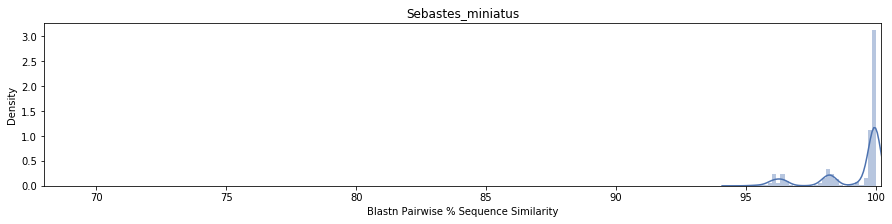

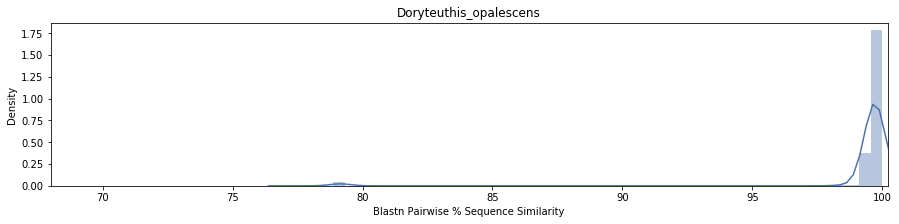

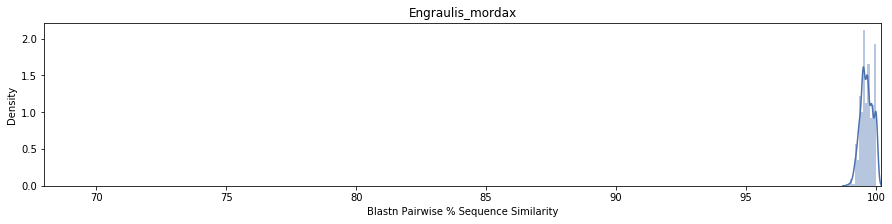

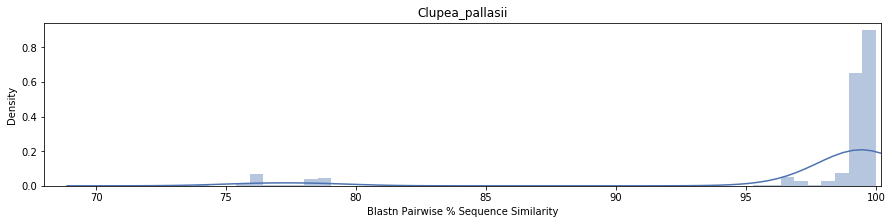

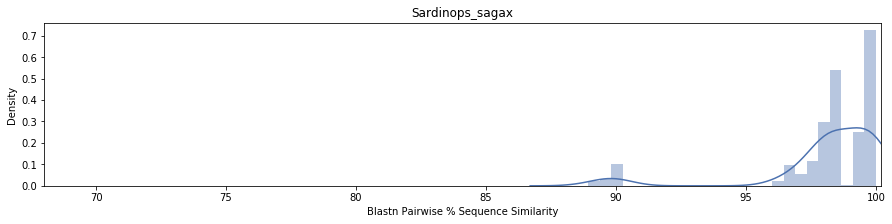

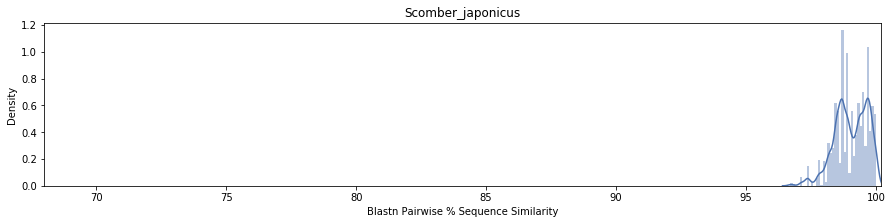

/workdir/aquaculture/nickconda/envs/ipyrad/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


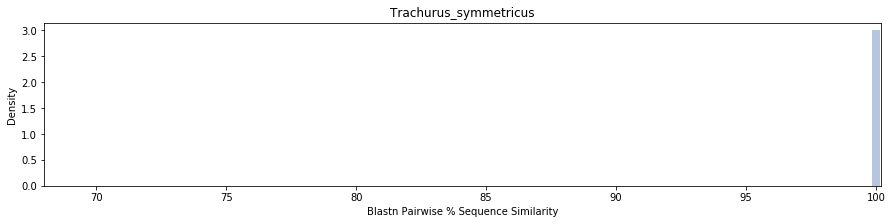

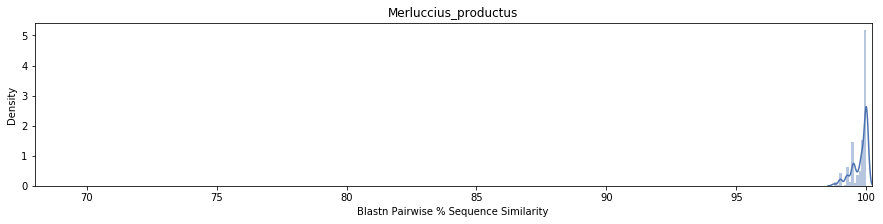

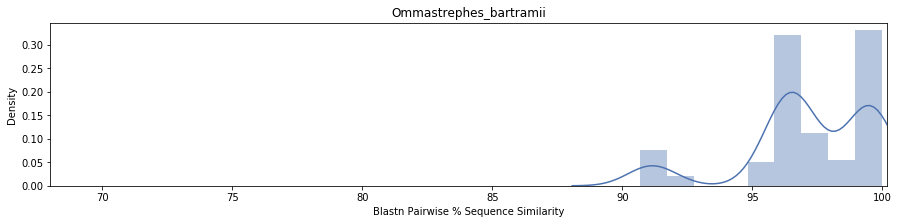

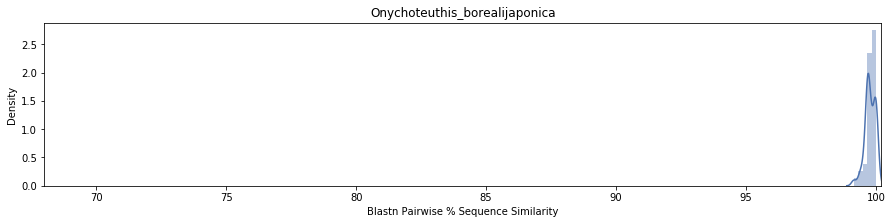

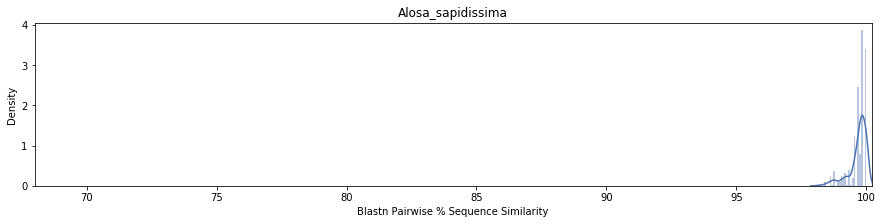

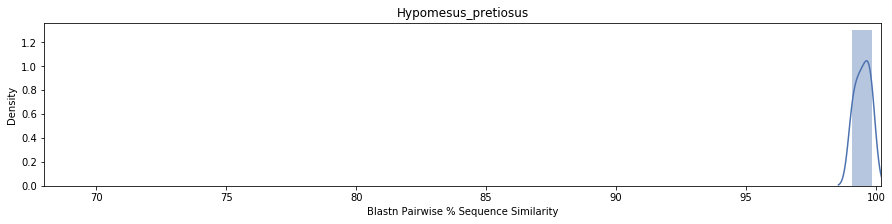

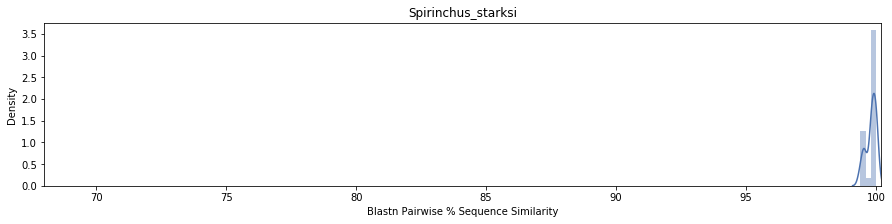

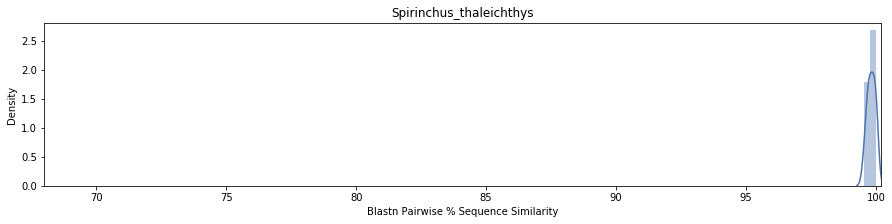

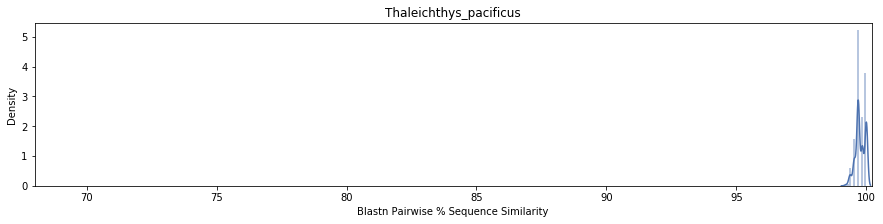

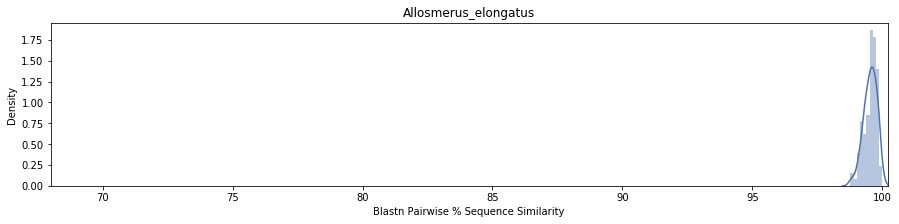

/workdir/aquaculture/nickconda/envs/ipyrad/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


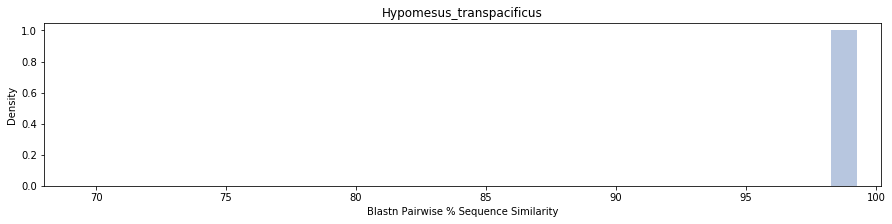

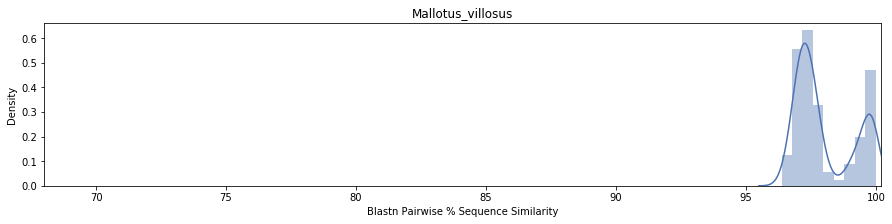

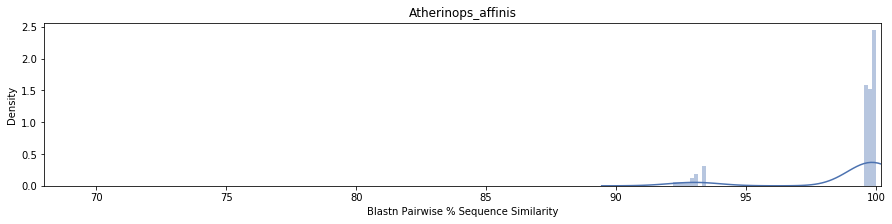

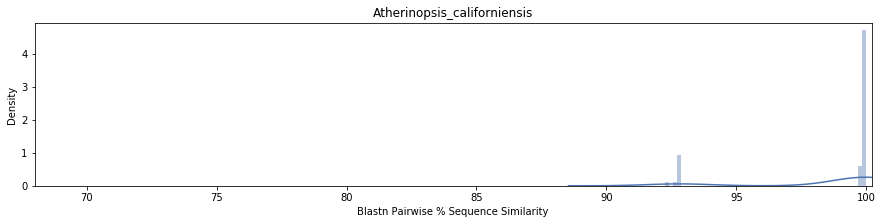

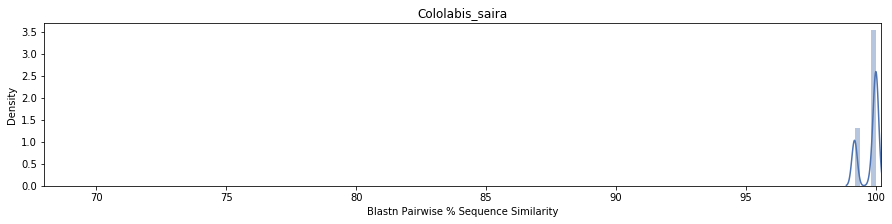

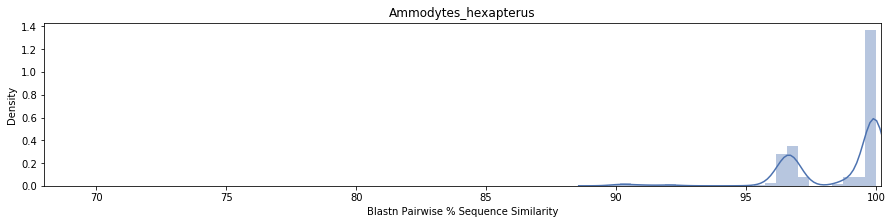

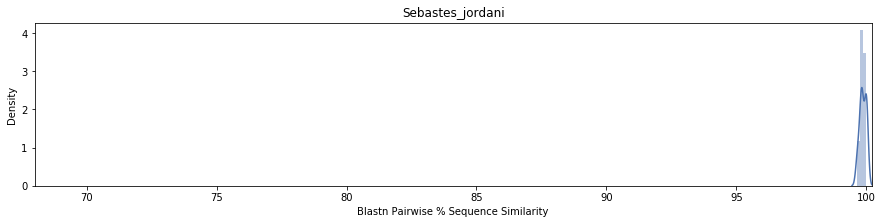

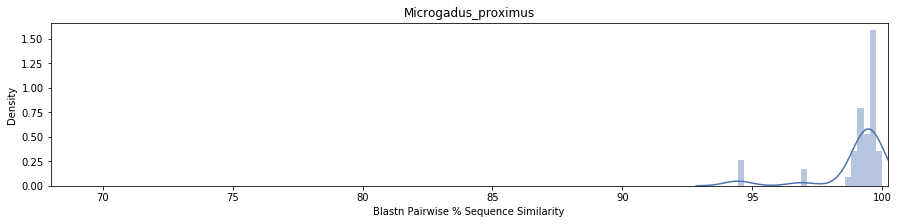

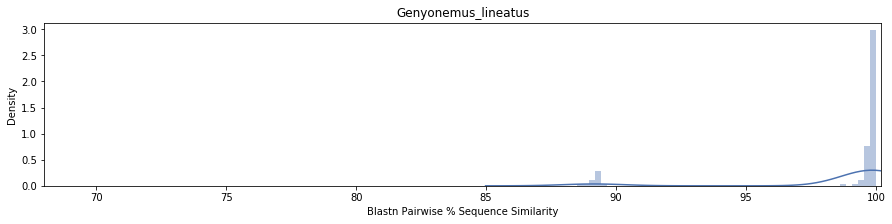

In [41]:
allfish = dict()
fish = dict()
for i in name[1]:
    allfish[i] = pd.read_csv("/workdir/aquaculture/genbankspecieslevel/data/pacific/" + i + "_COI_.blast6",sep='\t', header=None)

for i in allfish:
    if not allfish[i].empty:
        fish[i] = allfish[i]
    
##excluding duplicate comparisons and self-comparisons
    
for i in fish:
    fish[i] = fish[i][fish[i][0] != fish[i][1]]
    fish[i] = fish[i].loc[pd.DataFrame(np.sort(fish[i][[0,1]],1),index=fish[i].index).drop_duplicates(keep='first').index]  
   
for i in fish:
    ##sns.distplot(fish[i][2], hist=True, rug=True, rug_kws={"alpha":0.1, "linewidth": 0.7, "height":0.03 })
    plt.figure(figsize=(15,3))
    mx=100.2
    mn=68
    sns.distplot(fish[i][2])
    ##kde=sns.kdeplot(fish[i][2])
    ##rug=sns.rugplot(fish[i][2])
    plt.style.use('seaborn-deep')
    kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})
    plt.xlim(mn,mx)
    plt.xlabel("Blastn Pairwise % Sequence Similarity")
    plt.ylabel("Density")
    plt.title(""+i+"")
    plt.show()

## Mid-Atlantic Forage Species:

Homarus_americanus Spisula_solidissima Callinectes_sapidus Crassostrea_virginica Brevoortia_tyrannus Brevoortia_smithi Mercenaria_mercenaria Loligo_pealei Illex_illecebrosus Morone_saxatilis Paralichthys_dentatus Centropristis_striata Pomatomus_saltatrix Micropogonias_undulatus Leiostomus_xanthurus Stenotomus_chrysops Cynoscion_regalis Pseudopleuronectes_americanus Tautoga_onitis

https://roa.midatlanticocean.org/ocean-uses/status-trends-and-linkages/commercial-and-recreational-fishing/

In [1]:
!mkdir -p /workdir/aquaculture/genbankspecieslevel/data/atlantic

In [24]:
%%bash
for i in Homarus_americanus Spisula_solidissima Callinectes_sapidus Crassostrea_virginica Brevoortia_tyrannus Mercenaria_mercenaria Loligo_pealei Illex_illecebrosus Morone_saxatilis Paralichthys_dentatus Centropristis_striata Pomatomus_saltatrix Micropogonias_undulatus Leiostomus_xanthurus Stenotomus_chrysops Cynoscion_regalis Pseudopleuronectes_americanus Tautoga_onitis; do
    QUERY="$( echo $i | sed 's/_/ /g' )"
    TAXINFO="$( esearch -db taxonomy -query "${QUERY}" \
    | efetch -db taxonomy -format docsum \
    | xtract -pattern DocumentSummary -if Rank -equals species -element Id \
    | sed 's/\s/|/g' )"
    echo "${TAXINFO}|${i}"
done > /workdir/aquaculture/genbankspecieslevel/data/atlantic/GENBANKFISHES.txt

In [26]:
%%bash
for i in $( cat /workdir/aquaculture/genbankspecieslevel/data/atlantic/GENBANKFISHES.txt); do
    TAXID="$( echo ${i} | cut -d "|" -f 1 )"
    NAME="$( echo ${i} | cut -d "|" -f 2 )"
    NUMSEQ="$( esearch -db nuccore -query "txid${TAXID}[Organism:exp] AND animals[filter] AND (\"COXI\"[All Fields] OR \"COX1\"[All Fields] OR \"CO1\"[All Fields] OR \"COI\"[All Fields] OR \"cytochrome oxidase I\"[All Fields] OR \"cytochrome oxidase 1\"[All Fields] OR \"cytochrome oxidase subunit 1\"[All Fields] OR \"cytochrome oxidase subunit I\"[All Fields] OR \"cytochrome c oxidase subunit I\"[All Fields] OR \"cytochrome c oxidase subunit I\"[All Fields]) AND mitochondrion[filter] AND (\"100\"[SLEN] : \"2000\"[SLEN]) NOT environmental" \
        | grep '<Count>' | sed 's/Count//g' | tr -d '<>/' )"
    if [ ${NUMSEQ} != 0 ]; then
        echo "${NAME} ${NUMSEQ}"
        /workdir/aquaculture/scripts/ncbi_database_download.sh "txid${TAXID}[Organism:exp] AND animals[filter] AND (\"COXI\"[All Fields] OR \"COX1\"[All Fields] OR \"CO1\"[All Fields] OR \"COI\"[All Fields] OR \"cytochrome oxidase I\"[All Fields] OR \"cytochrome oxidase 1\"[All Fields] OR \"cytochrome oxidase subunit 1\"[All Fields] OR \"cytochrome oxidase subunit I\"[All Fields] OR \"cytochrome c oxidase subunit I\"[All Fields] OR \"cytochrome c oxidase subunit I\"[All Fields]) AND mitochondrion[filter] AND (\"100\"[SLEN] : \"2000\"[SLEN]) NOT environmental" /workdir/aquaculture/genbankspecieslevel/data/atlantic ${NAME}_COI
    fi
done

Homarus_americanus   14
DONE
Spisula_solidissima   23
DONE
Callinectes_sapidus   1004
DONE
Crassostrea_virginica   215
DONE
Brevoortia_tyrannus   295
DONE
Mercenaria_mercenaria   167
DONE
Loligo_pealei   44
DONE
Illex_illecebrosus   14
DONE
Morone_saxatilis   20
DONE
Paralichthys_dentatus   11
DONE
Centropristis_striata   15
DONE
Pomatomus_saltatrix   128
DONE
Micropogonias_undulatus   28
DONE
Leiostomus_xanthurus   16
DONE
Stenotomus_chrysops   16
DONE
Cynoscion_regalis   23
DONE
Pseudopleuronectes_americanus   23
DONE
Tautoga_onitis   4
DONE


#### Performing pairwise comparisons using `blastn`:

In [32]:
%%bash
for i in $( cat /workdir/aquaculture/genbankspecieslevel/data/atlantic/GENBANKFISHES.txt); do
    TAXID="$( echo ${i} | cut -d "|" -f 1 )"
    NAME="$( echo ${i} | cut -d "|" -f 2 )"
    blastn \
        -task blastn \
        -query /workdir/aquaculture/genbankspecieslevel/data/atlantic/${NAME}_COI_ncbirefdb.fasta \
        -subject /workdir/aquaculture/genbankspecieslevel/data/atlantic/${NAME}_COI_ncbirefdb.fasta \
        -outfmt "6" \
        -out /workdir/aquaculture/data/genbankspecieslevel/atlantic/${NAME}_COI_.blast6
done

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [36]:
name = pd.read_csv("/workdir/aquaculture/genbankspecieslevel/data/atlantic/GENBANKFISHES.txt",sep='|', header=None)
name

,0,1
0,6706,Homarus_americanus
1,6584,Spisula_solidissima
2,6763,Callinectes_sapidus
3,6565,Crassostrea_virginica
4,224708,Brevoortia_tyrannus
5,6596,Mercenaria_mercenaria
6,1051067,Loligo_pealei
7,6629,Illex_illecebrosus
8,34816,Morone_saxatilis
9,66718,Paralichthys_dentatus


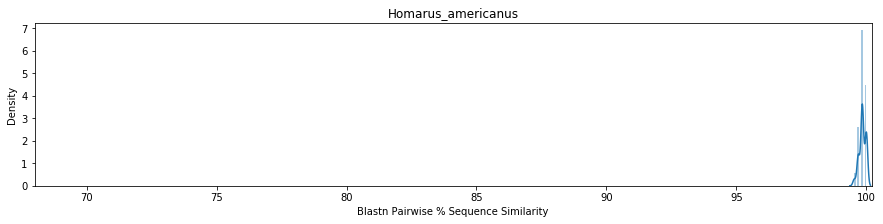

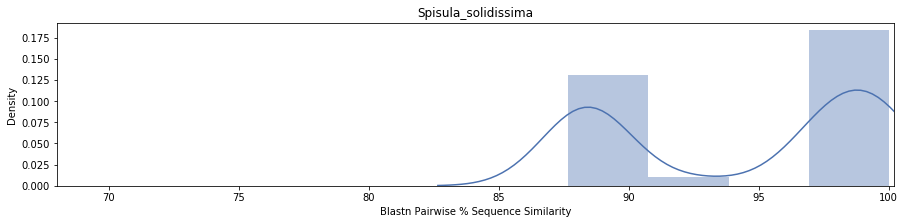

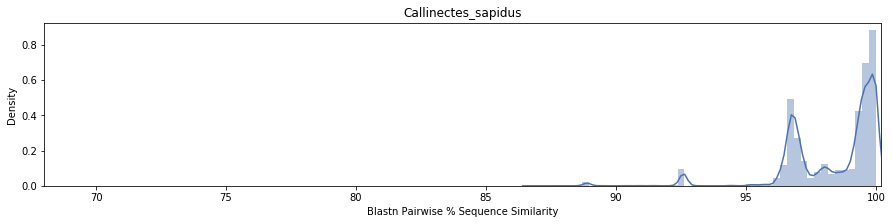

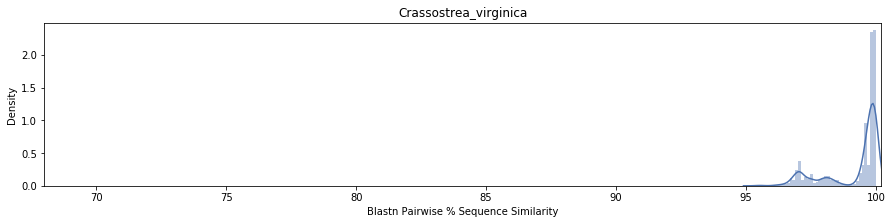

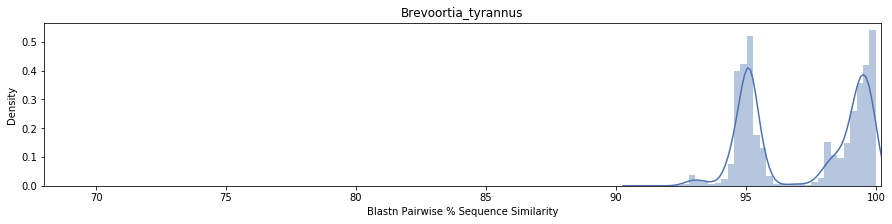

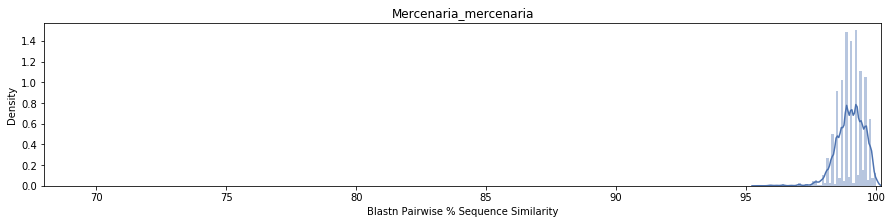

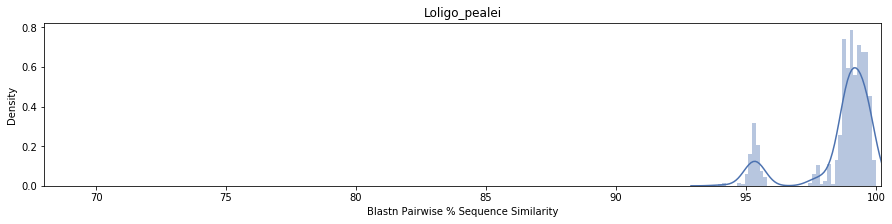

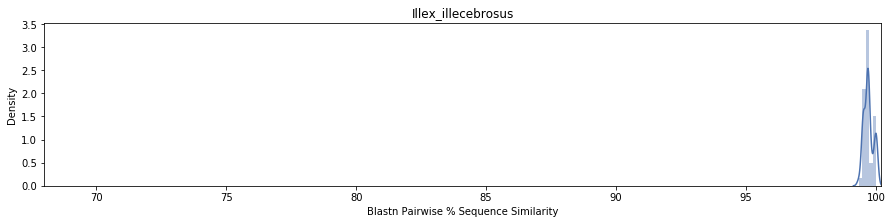

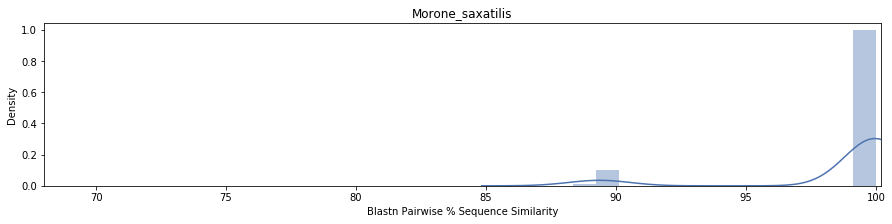

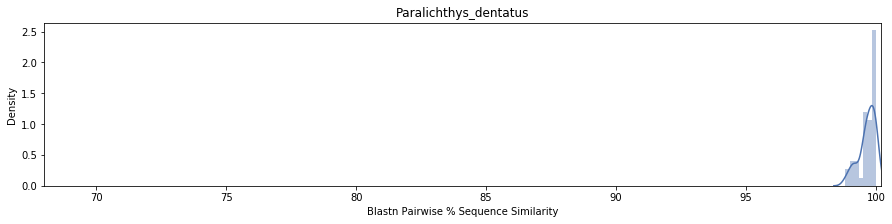

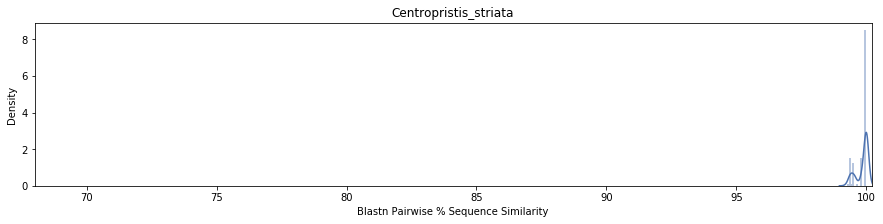

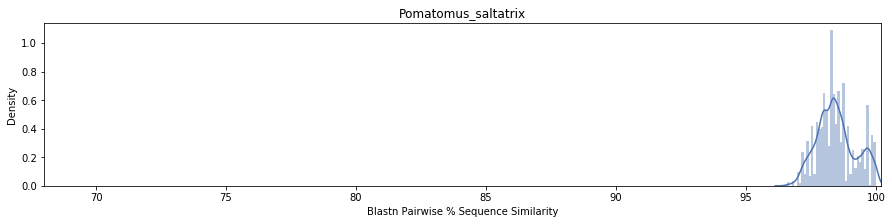

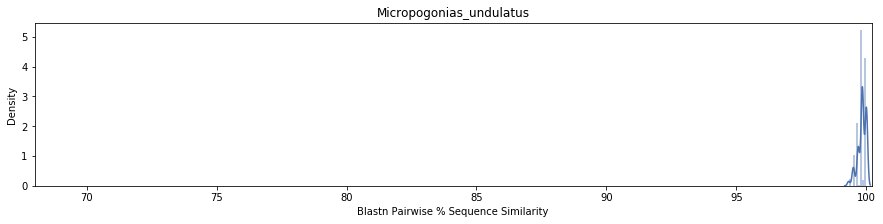

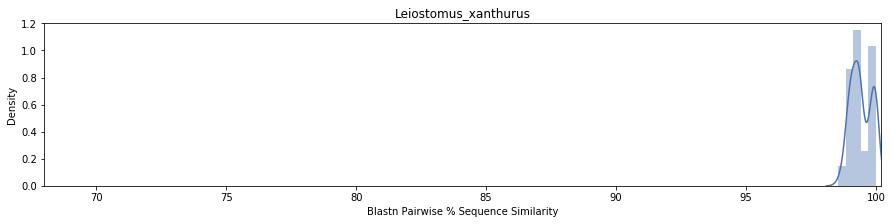

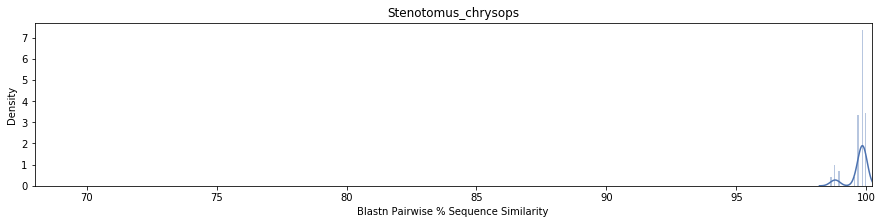

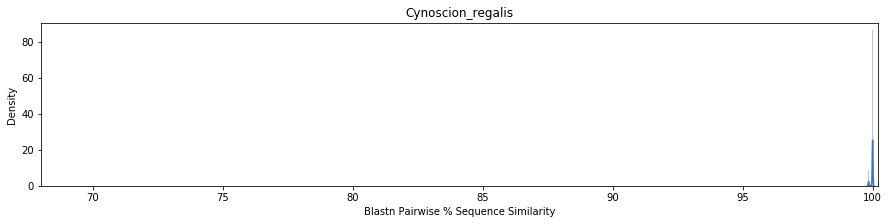

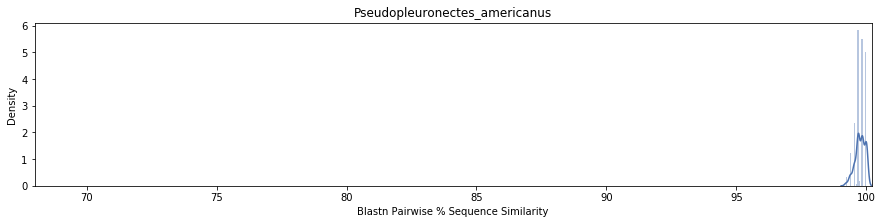

/workdir/aquaculture/nickconda/envs/ipyrad/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


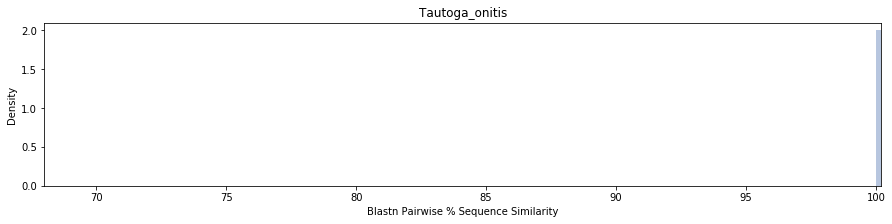

In [39]:
allfish = dict()
fish = dict()
for i in name[1]:
    allfish[i] = pd.read_csv("/workdir/aquaculture/genbankspecieslevel/data/atlantic/" + i + "_COI_.blast6",sep='\t', header=None)

for i in allfish:
    if not allfish[i].empty:
        fish[i] = allfish[i]
        
##excluding duplicate comparisons and self-comparisons
    
for i in fish:
    fish[i] = fish[i][fish[i][0] != fish[i][1]]
    fish[i] = fish[i].loc[pd.DataFrame(np.sort(fish[i][[0,1]],1),index=fish[i].index).drop_duplicates(keep='first').index]  
 
for i in fish:
    ##sns.distplot(fish[i][2], hist=True, rug=True, rug_kws={"alpha":0.1, "linewidth": 0.7, "height":0.03 })
    plt.figure(figsize=(15,3))
    mx=100.2
    mn=68
    sns.distplot(fish[i][2])
    ##kde=sns.kdeplot(fish[i][2])
    ##rug=sns.rugplot(fish[i][2])
    plt.style.use('seaborn-deep')
    kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})
    plt.xlim(mn,mx)
    plt.xlabel("Blastn Pairwise % Sequence Similarity")
    plt.ylabel("Density")
    plt.title(""+i+"")
    plt.show()